# 데이터 전처리 과정

---

## 1. KOBIS 월별 박스오피스 데이터

### 1.1 월별 박스오피스 데이터 불러오기

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
# KOBIS 월별 박스오피스 페이지에서 웹 크롤링 작업 후 저장된 raw 데이터 파일
df = pd.read_csv('./data/monthly_raw.csv', encoding='utf-8-sig', thousands=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88624 entries, 0 to 88623
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   영화명         88624 non-null  object
 1   개봉일         61161 non-null  object
 2   관객수         88624 non-null  int64 
 3   누적관객수       88624 non-null  int64 
 4   year_month  88624 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.4+ MB


In [43]:
# 컬럼명 영문 전환
df.columns = ['movieNm', 'openDt', 'view', 'acc_view', 'year_month']

In [44]:
# openDt 컬럼 '-' 제거
df['openDt'] = df['openDt'].str.replace('-', '')
df.head()

,movieNm,openDt,view,acc_view,year_month
0,투모로우,20040603,1605042,1605042,200406
1,내 여자친구를 소개합니다,20040603,1291669,1292779,200406
2,슈렉2,20040618,1048825,1048825,200406
3,트로이,20040521,1004638,1950907,200406
4,령,20040617,455666,455666,200406


### 1.2 개봉일 결측치 처리

In [45]:
# 개봉일에 27,463개의 결측치 확인. 먼저 어떤 값인지 살펴 보기로 함
df_null = df[df['openDt'].isna()]

In [46]:
df_null_pivot = df_null.groupby(['movieNm']).agg({'year_month':'count',
                                                'view':'sum',
                                                }).reset_index()

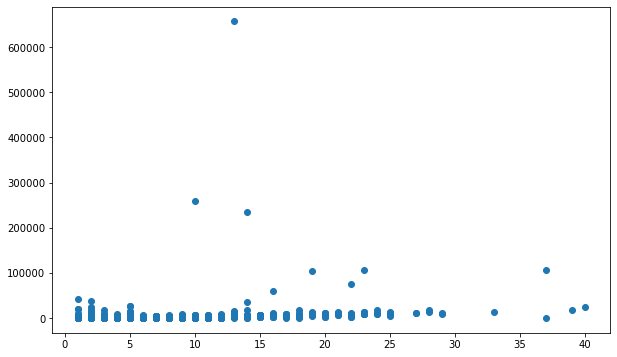

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(data = df_null_pivot, x='year_month', y='view')
plt.show()

In [48]:
# 개봉일이 없는 영화의 경우, 10만 관객 미만의 영화가 대다수인것을 확인
df_null_pivot.sort_values(by='view', ascending=False).head(20)

,movieNm,year_month,view
5593,로보트 태권V(76년 디지털 복원판),13,656670
7498,뽀로로 극장판 눈요정 마을 대모험,10,258909
223,2005 [통합]패키지영화,14,234307
226,2006 [통합]영화제/기획전/회고전 등,23,106719
10213,오페라의 유령 : 25주년 특별 공연,37,105298
2693,"[통합]회고전, 기획전 등",19,104955
222,2005 [통합]영화제/기획전/회고전 등,22,75563
229,2007 [통합]영화제/기획전/회고전 등,16,60705
1166,BIFAN2016 판타스틱 단편 걸작선 1,1,43003
13678,판타스틱 단편 걸작선 1,2,37793


In [49]:
# 영화제/걸작선의 경우 나중에 데이터 병합 후 한번에 처리하기로 함
# 진짜 '영화'인 경우, 위의 테이블에 나온 영화만 네이버에서 개봉일 제공시에만 수작업으로 추가함.
df.loc[df['movieNm'] == '로보트 태권V(76년 디지털 복원판)', 'openDt'] = "19760724"
df.loc[df['movieNm'] == '뽀로로 극장판 눈요정 마을 대모험', 'openDt'] = "20141211"
df.loc[df['movieNm'] == '오페라의 유령 : 25주년 특별 공연', 'openDt'] = "20111215"

In [50]:
len(df[df['openDt'].isna()])

27403

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88624 entries, 0 to 88623
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movieNm     88624 non-null  object
 1   openDt      61221 non-null  object
 2   view        88624 non-null  int64 
 3   acc_view    88624 non-null  int64 
 4   year_month  88624 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.4+ MB


In [52]:
# 나머지 27,403개의 개봉일 결측치 데이터는 관객 수 자체도 적기에 제거하기로 함.
df = df.dropna(axis=0)

In [53]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61221 entries, 0 to 61220
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movieNm     61221 non-null  object
 1   openDt      61221 non-null  object
 2   view        61221 non-null  int64 
 3   acc_view    61221 non-null  int64 
 4   year_month  61221 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


### 1.3 영화별 누적 관객수 테이블로 전환

In [143]:
df = df.groupby(['movieNm', 'openDt']).agg({'view':'sum'}).reset_index()
df.head()

,movieNm,openDt,view
0,#살아있다,20200624,1903992
1,#아이엠히어,20210114,16404
2,#위왓치유,20210603,1855
3,...ing,20031128,44
4,0.0MHz,20190529,137294


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20698 entries, 0 to 20697
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieNm  20698 non-null  object
 1   openDt   20698 non-null  object
 2   view     20698 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 485.2+ KB


### 1.4 1,000관객수 이하의 영화는 제거

In [146]:
df[df['view'] < 1000]

,movieNm,openDt,view
3,...ing,20031128,44
6,007 북경특급 2,20140501,344
12,007 퀀텀 오브 솔러스+굿 바이+뱅크 잡,20081105,229
13,007 퀀텀 오브 솔러스+굿 바이+순정만화,20081127,121
15,10 미니츠 곤,20191122,21
...,...,...,...
20689,힐링캠프-한세상 무삭제,20170727,1
20691,힘 좋은 시아버지와 착한 며느리,20210318,20
20694,힘좋은 시아버지와 베란다,20190603,1
20695,힙스터: 안개의 덫,20151021,1


In [150]:
remove = df.index[df['view']< 1000].tolist()
df = df.drop(remove, axis=0).reset_index(drop=True)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieNm  8010 non-null   object
 1   openDt   8010 non-null   object
 2   view     8010 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 187.9+ KB


### 1.5 KOBIS 월별 데이터 final

In [152]:
df.to_csv("./data/monthly_final.csv", encoding='utf-8-sig', index=False)

---

## 2. KOFIC 영화 목록 데이터

### 2.1 영화 목록 불러오기

In [60]:
# API를 이용하여 불러온 영화 목록 데이터 확인

movie_list = pd.read_csv('./data/movielist_raw.csv', encoding='utf-8-sig', thousands=',')
movie_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18897 entries, 0 to 18896
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieCd  18897 non-null  object
 1   movieNm  18897 non-null  object
 2   openDt   18897 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 443.0+ KB


In [61]:
movie_list.head()

,movieCd,movieNm,openDt
0,20040598,해리포터와 아즈카반의 죄수,20040716
1,20040666,나쁜 교육,20040917
2,20030440,자토이치,20040130
3,20040606,천년여우,20040709
4,20040487,범죄의 재구성,20040415


---

## 3. KOFIC 영화 상세정보 데이터 

### 3.1 데이터 불러오기

In [83]:
import missingno as msno

In [87]:
# 위에서 불러온 영화 목록 데이터의 movieCd를 기준으로 API를 이용하여 각 영화의 상세정보를 불러옴
details_df = pd.read_csv('./data/details_raw.csv', encoding='utf-8-sig', thousands=',')

In [88]:
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18897 entries, 0 to 18896
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieCd           18897 non-null  object 
 1   movieNm           18897 non-null  object 
 2   movieNmEn         15021 non-null  object 
 3   showTm            18531 non-null  float64
 4   prdtYear          18320 non-null  float64
 5   openDt            18897 non-null  int64  
 6   prdtStatNm        18752 non-null  object 
 7   typeNm            18894 non-null  object 
 8   companys          18897 non-null  object 
 9   nationNm          18864 non-null  object 
 10  genres_1          18716 non-null  object 
 11  genres_2          8132 non-null   object 
 12  directorNm        16969 non-null  object 
 13  directorNmEn      12087 non-null  object 
 14  actor1_Nm         11390 non-null  object 
 15  actor1_NmEn       11390 non-null  object 
 16  watchGradeNm      17871 non-null  object

In [89]:
details_df.head()

,movieCd,movieNm,movieNmEn,showTm,prdtYear,openDt,prdtStatNm,typeNm,companys,nationNm,genres_1,genres_2,directorNm,directorNmEn,actor1_Nm,actor1_NmEn,watchGradeNm,dist_companyCd,dist_companyNm,dist_companyNmEn
0,20040598,해리포터와 아즈카반의 죄수,Harry Potter And The Prisoner Of Azkaban,136.0,2004.0,20040716,개봉,장편,"[{'companyCd': '20101670', 'companyNm': '워너브러더...",미국,드라마,NaN,알폰소 쿠아론,Alfonso Cuaron,다니엘 래드클리프,Daniel Radcliffe,전체관람가,20100043.0,워너브러더스 코리아(주),Warner Bros. Korea
1,20040666,나쁜 교육,Bad Education,104.0,2004.0,20040917,개봉,장편,"[{'companyCd': '20102420', 'companyNm': '까날 플러...",스페인,드라마,NaN,페드로 알모도바르,Pedro Almodovar,NaN,NaN,18세관람가,20217646.0,해피송,Happy Song
2,20030440,자토이치,Zatoichi,119.0,2003.0,20040130,개봉,장편,"[{'companyCd': '20100631', 'companyNm': '(주)영화...",일본,액션,NaN,기타노 다케시,Takeshi Kitano,기타노 다케시,Takeshi Kitano,15세관람가,20100631.0,(주)영화사 진진,JINJIN Pictures
3,20040606,천년여우,Millennium Actress,87.0,2001.0,20040709,개봉,장편,"[{'companyCd': '20101537', 'companyNm': '매드하우스...",일본,스릴러,애니메이션,곤 사토시,Kon Satoshi,NaN,NaN,12세관람가,20100250.0,무비즈엔터테인먼트㈜,Movies Entertainment
4,20040487,범죄의 재구성,The Big Swindle,116.0,2004.0,20040415,개봉,장편,"[{'companyCd': '20100123', 'companyNm': '(주)싸이...",한국,스릴러,NaN,최동훈,CHOI Dong-hoon,김윤석,KIM Yun-seok,18세관람가,20100103.0,(주)쇼박스,Showbox Corp


<AxesSubplot:>

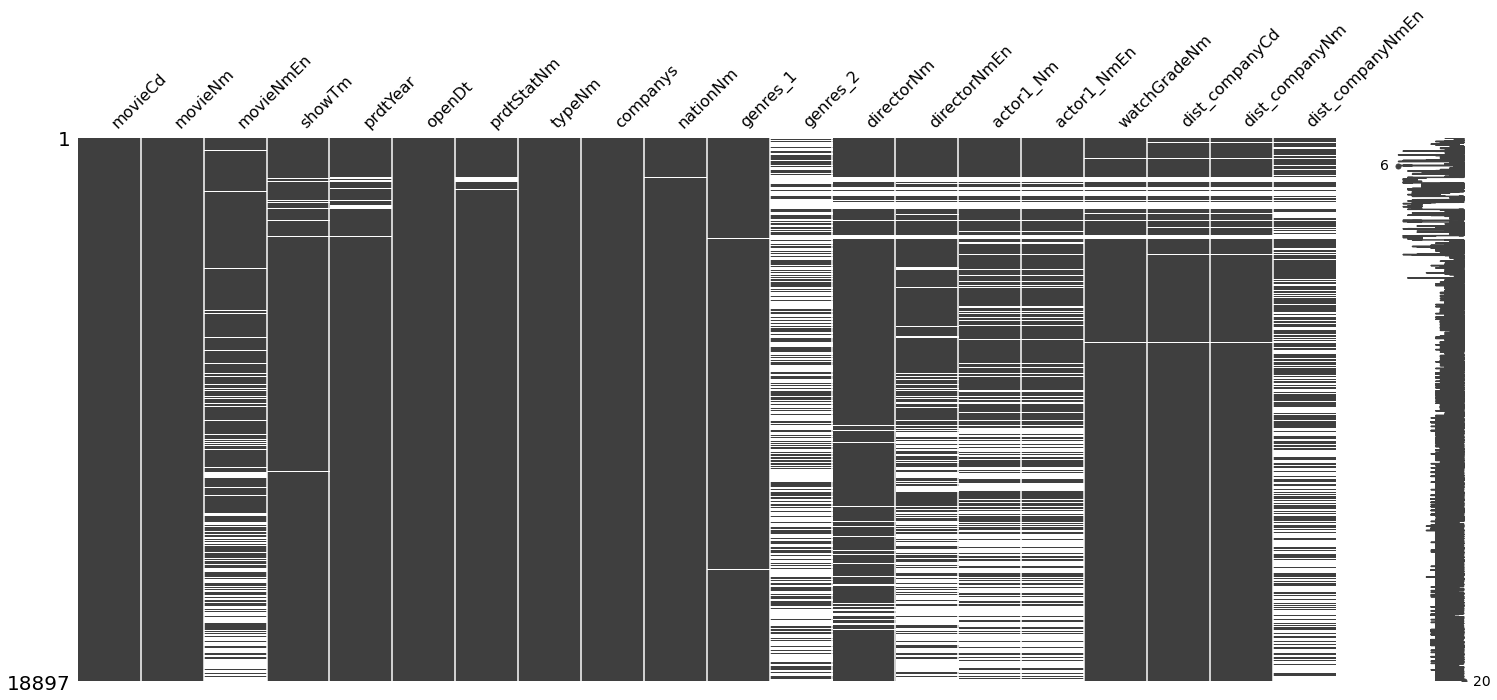

In [91]:
# 결측치 확인
msno.matrix(details_df)

### 3.2 제작 국가 전처리

In [92]:
details_df[details_df['nationNm'].isna()]

,movieCd,movieNm,movieNmEn,showTm,prdtYear,openDt,prdtStatNm,typeNm,companys,nationNm,genres_1,genres_2,directorNm,directorNmEn,actor1_Nm,actor1_NmEn,watchGradeNm,dist_companyCd,dist_companyNm,dist_companyNmEn
466,20050297,2005칸국제광고제 수상작 필름페스티벌,NaN,NaN,2005.0,20051029,기타,장편,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
595,20050166,2005년 미장센 단편영화제,NaN,NaN,2005.0,20050623,기타,기타,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,20050337,서울독립영화제2005,NaN,NaN,NaN,20051209,기타,기타,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,20050266,제6회 서울유럽영화제[2005.10.26-10.30],NaN,NaN,2005.0,20051026,기타,기타,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
598,20050294,CJ 아시아인디영화제[2005.11.3-11.8],NaN,NaN,2005.0,20051103,기타,기타,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599,20050243,제2회 서울환경영화제[2005.9.8-9.14],2nd Green Film Festival in Seoul,NaN,2005.0,20050908,기타,기타,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824,20060290,2006칸국제광고제 수상작 페스티벌,NaN,NaN,2006.0,20060914,기타,기타,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
826,20060184,KBS프리미어 페스티벌,NaN,NaN,NaN,20060615,기타,기타,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
827,20060141,SICAF2006 서울국제만화애니페스티벌(0524-0528),NaN,NaN,2006.0,20060524,기타,기타,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
967,20060195,제5회 미장센단편영화제(2006),NaN,NaN,NaN,20060629,기타,기타,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
len(details_df[details_df['nationNm'].isna()])

33

In [94]:
# nationNm에 null 값이 들어간 데이터는 영화제관련 영상이므로 지우기로함.
details_df = details_df.dropna(subset=['nationNm'])

In [95]:
details_df = details_df.reset_index(drop=True)
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18864 entries, 0 to 18863
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieCd           18864 non-null  object 
 1   movieNm           18864 non-null  object 
 2   movieNmEn         15003 non-null  object 
 3   showTm            18519 non-null  float64
 4   prdtYear          18307 non-null  float64
 5   openDt            18864 non-null  int64  
 6   prdtStatNm        18727 non-null  object 
 7   typeNm            18862 non-null  object 
 8   companys          18864 non-null  object 
 9   nationNm          18864 non-null  object 
 10  genres_1          18698 non-null  object 
 11  genres_2          8132 non-null   object 
 12  directorNm        16969 non-null  object 
 13  directorNmEn      12087 non-null  object 
 14  actor1_Nm         11390 non-null  object 
 15  actor1_NmEn       11390 non-null  object 
 16  watchGradeNm      17869 non-null  object

### 3.3 장르 컬럼 전처리

In [96]:
len(details_df[details_df['genres_1'].isna()])

166

In [97]:
# 영화의 장르가 없는 데이터를 살펴본 결과, 성인영화나 영화제 혹은 확장판/감독판인 경우가 대다수이기에 삭제.
details_df = details_df.dropna(subset=['genres_1'])

In [98]:
details_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18698 entries, 0 to 18863
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieCd           18698 non-null  object 
 1   movieNm           18698 non-null  object 
 2   movieNmEn         14899 non-null  object 
 3   showTm            18380 non-null  float64
 4   prdtYear          18207 non-null  float64
 5   openDt            18698 non-null  int64  
 6   prdtStatNm        18562 non-null  object 
 7   typeNm            18696 non-null  object 
 8   companys          18698 non-null  object 
 9   nationNm          18698 non-null  object 
 10  genres_1          18698 non-null  object 
 11  genres_2          8132 non-null   object 
 12  directorNm        16892 non-null  object 
 13  directorNmEn      12063 non-null  object 
 14  actor1_Nm         11378 non-null  object 
 15  actor1_NmEn       11378 non-null  object 
 16  watchGradeNm      17791 non-null  object

In [99]:
# 성인물 장르 데이터 제거
len(details_df.loc[(details_df['genres_1'] == '성인물(에로)') | (details_df['genres_2'] == '성인물(에로)')])

2099

In [100]:
remove = details_df.index[(details_df['genres_1'] == '성인물(에로)') | (details_df['genres_2'] == '성인물(에로)')].tolist()
details_df = details_df.drop(remove, axis=0)

In [101]:
# 공연 장르 데이터 제거
len(details_df.loc[(details_df['genres_1'] == '공연') | (details_df['genres_2'] == '공연')])

277

In [102]:
remove = details_df.index[(details_df['genres_1'] == '공연') | (details_df['genres_2'] == '공연')].tolist()
details_df = details_df.drop(remove, axis=0)

In [103]:
details_df = details_df.reset_index(drop=True)
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16322 entries, 0 to 16321
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieCd           16322 non-null  object 
 1   movieNm           16322 non-null  object 
 2   movieNmEn         13075 non-null  object 
 3   showTm            16007 non-null  float64
 4   prdtYear          15842 non-null  float64
 5   openDt            16322 non-null  int64  
 6   prdtStatNm        16186 non-null  object 
 7   typeNm            16321 non-null  object 
 8   companys          16322 non-null  object 
 9   nationNm          16322 non-null  object 
 10  genres_1          16322 non-null  object 
 11  genres_2          7807 non-null   object 
 12  directorNm        14856 non-null  object 
 13  directorNmEn      11132 non-null  object 
 14  actor1_Nm         10603 non-null  object 
 15  actor1_NmEn       10603 non-null  object 
 16  watchGradeNm      15437 non-null  object

In [104]:
details_df['genres_1'].value_counts()

멜로/로맨스      4390
드라마         3690
액션          1749
애니메이션       1062
코미디         1051
공포(호러)       836
다큐멘터리        739
기타           673
스릴러          570
범죄           381
SF           321
미스터리         221
판타지          185
어드벤처         121
전쟁           116
가족            98
사극            64
뮤지컬           40
서부극(웨스턴)      15
Name: genres_1, dtype: int64

### 3.4 단편 영화 전처리

In [105]:
len(details_df[details_df['typeNm'] == '단편'])

89

In [106]:
# 단편 영화는 모델 고려 대상이 아니기에 삭제
remove = details_df.index[details_df['typeNm'] == '단편'].tolist()
details_df = details_df.drop(remove, axis=0)

In [107]:
details_df = details_df.reset_index(drop=True)
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16233 entries, 0 to 16232
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieCd           16233 non-null  object 
 1   movieNm           16233 non-null  object 
 2   movieNmEn         12999 non-null  object 
 3   showTm            15939 non-null  float64
 4   prdtYear          15782 non-null  float64
 5   openDt            16233 non-null  int64  
 6   prdtStatNm        16097 non-null  object 
 7   typeNm            16232 non-null  object 
 8   companys          16233 non-null  object 
 9   nationNm          16233 non-null  object 
 10  genres_1          16233 non-null  object 
 11  genres_2          7795 non-null   object 
 12  directorNm        14816 non-null  object 
 13  directorNmEn      11093 non-null  object 
 14  actor1_Nm         10579 non-null  object 
 15  actor1_NmEn       10579 non-null  object 
 16  watchGradeNm      15413 non-null  object

### 3.5 영화제 전처리

In [108]:
# 영화제는 고려 대상이 아니기에 삭제
details_df[details_df['movieNm'].str.contains("영화제")]

,movieCd,movieNm,movieNmEn,showTm,prdtYear,openDt,prdtStatNm,typeNm,companys,nationNm,genres_1,genres_2,directorNm,directorNmEn,actor1_Nm,actor1_NmEn,watchGradeNm,dist_companyCd,dist_companyNm,dist_companyNmEn
946,20060382,서울독립영화제2006,2006 Seoul Independent Film Festival,NaN,NaN,20061207,기타,기타,[],한국,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1366,20081506,해외단편걸작선2-국제영화제 우수작 모음,overseas Short Film Festival 2,NaN,NaN,20070907,기타,기타,[],기타,드라마,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1377,20080131,한양영화제,Package Screening,NaN,NaN,20070209,기타,기타,[],한국,기타,NaN,NaN,NaN,NaN,NaN,고등학생이상관람가,NaN,NaN,NaN
1379,20071074,이주노동자영화제 다시보기! with 이주노동자의 방송MWTV,Package Screening,86.0,NaN,20071225,기타,기타,[],기타,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1399,20070662,2회 브라질 영화제: 시네마 노보 회고전,2nd Brazilian Film Festival: Cinema Novo Retro...,NaN,NaN,20071119,기타,기타,[],기타,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3787,20110591,11th서울LGBT영화제,NaN,NaN,NaN,20110602,기타,기타,[],한국,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3790,20110321,제8회 서울환경영화제[2011.05.19-05.25],8th Green Film Festival in Seoul,NaN,NaN,20110519,기타,기타,[],한국,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3809,20119573,KAFA영화제-애니메이션,NaN,50.0,2010.0,20110210,기타,기타,[],한국,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3810,20119572,KAFA영화제-폐막식,NaN,60.0,2010.0,20110210,기타,기타,[],한국,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
len(details_df[details_df['movieNm'].str.contains("영화제")])

64

In [112]:
remove = details_df.index[(details_df['movieNm'].str.contains("영화제"))].tolist()
details_df = details_df.drop(remove, axis=0)

In [113]:
details_df = details_df.reset_index(drop=True)
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16169 entries, 0 to 16168
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieCd           16169 non-null  object 
 1   movieNm           16169 non-null  object 
 2   movieNmEn         12950 non-null  object 
 3   showTm            15926 non-null  float64
 4   prdtYear          15767 non-null  float64
 5   openDt            16169 non-null  int64  
 6   prdtStatNm        16039 non-null  object 
 7   typeNm            16168 non-null  object 
 8   companys          16169 non-null  object 
 9   nationNm          16169 non-null  object 
 10  genres_1          16169 non-null  object 
 11  genres_2          7794 non-null   object 
 12  directorNm        14816 non-null  object 
 13  directorNmEn      11093 non-null  object 
 14  actor1_Nm         10579 non-null  object 
 15  actor1_NmEn       10579 non-null  object 
 16  watchGradeNm      15411 non-null  object

### 3.6 미개봉 영화 전처리

In [115]:
details_df['prdtStatNm'].value_counts()

개봉      15271
기타        745
개봉예정       15
촬영준비        7
후반작업        1
Name: prdtStatNm, dtype: int64

In [116]:
remove = details_df.index[(details_df['prdtStatNm'] == '촬영준비') | (details_df['prdtStatNm'] == '기타') | (details_df['prdtStatNm'] == '개봉예정') | (details_df['prdtStatNm'] == '후반작업')].tolist()
details_df = details_df.drop(remove, axis=0)

In [117]:
details_df = details_df.reset_index(drop=True)
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15401 entries, 0 to 15400
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieCd           15401 non-null  object 
 1   movieNm           15401 non-null  object 
 2   movieNmEn         12213 non-null  object 
 3   showTm            15308 non-null  float64
 4   prdtYear          15280 non-null  float64
 5   openDt            15401 non-null  int64  
 6   prdtStatNm        15271 non-null  object 
 7   typeNm            15401 non-null  object 
 8   companys          15401 non-null  object 
 9   nationNm          15401 non-null  object 
 10  genres_1          15401 non-null  object 
 11  genres_2          7701 non-null   object 
 12  directorNm        14624 non-null  object 
 13  directorNmEn      10909 non-null  object 
 14  actor1_Nm         10428 non-null  object 
 15  actor1_NmEn       10428 non-null  object 
 16  watchGradeNm      15260 non-null  object

### 3.7 무삭제판 영화 전처리

In [118]:
len(details_df[details_df['movieNm'].str.contains("무삭제")])

998

In [120]:
remove = details_df.index[(details_df["movieNm"].str.contains("무삭제"))].tolist()
details_df = details_df.drop(remove, axis=0)

In [121]:
details_df = details_df.reset_index(drop=True)
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14403 entries, 0 to 14402
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieCd           14403 non-null  object 
 1   movieNm           14403 non-null  object 
 2   movieNmEn         12096 non-null  object 
 3   showTm            14311 non-null  float64
 4   prdtYear          14282 non-null  float64
 5   openDt            14403 non-null  int64  
 6   prdtStatNm        14273 non-null  object 
 7   typeNm            14403 non-null  object 
 8   companys          14403 non-null  object 
 9   nationNm          14403 non-null  object 
 10  genres_1          14403 non-null  object 
 11  genres_2          7494 non-null   object 
 12  directorNm        13646 non-null  object 
 13  directorNmEn      10798 non-null  object 
 14  actor1_Nm         10295 non-null  object 
 15  actor1_NmEn       10295 non-null  object 
 16  watchGradeNm      14262 non-null  object

### 3.8 제작 상태 전처리

In [124]:
details_df[details_df['prdtStatNm'].isna()]

,movieCd,movieNm,movieNmEn,showTm,prdtYear,openDt,prdtStatNm,typeNm,companys,nationNm,genres_1,genres_2,directorNm,directorNmEn,actor1_Nm,actor1_NmEn,watchGradeNm,dist_companyCd,dist_companyNm,dist_companyNmEn
1115,20070229,일본인디필름 페스티벌 리턴즈,Package Screening,NaN,NaN,20070628,NaN,장편,[],일본,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1116,20070605,서울아트시네마 애니충격 감독열전,cinematheque,NaN,NaN,20071026,NaN,장편,[],기타,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1132,20070331,코마네코 : 호기심 많은 고양이,Komaneko: A Curious Cat,60.0,NaN,20070719,NaN,장편,[],일본,기타,NaN,고다 츠네오,Tsuneo Koda,NaN,NaN,NaN,NaN,NaN,NaN
1323,20070311,"시네마정동-해리포터와불사조기사단,해부학교실,트랜스포머",Package Screening,NaN,NaN,20070712,NaN,장편,[],기타,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1324,20070341,발칙한시선 1부1섹션,Stimulating View : Youth Competition Section 1...,82.0,NaN,20070719,NaN,장편,[],기타,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,20080681,인디포럼2008-일본 독립영화 특별전3,Indie Forum 2008,74.0,2005.0,20080530,NaN,장편,[],일본,드라마,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1614,20080682,인디포럼2008-일본 독립영화 특별전4,Indie Forum 2008,83.0,2006.0,20080530,NaN,장편,[],일본,드라마,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1615,20080683,인디포럼2008-일본 독립영화 특별전5,Indie Forum 2008,NaN,2006.0,20080530,NaN,장편,[],일본,드라마,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1822,20080019,무방비도시 + 마법에 걸린 사랑 + 미스트,Package Screening,343.0,NaN,20080110,NaN,장편,[],기타,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
details_df = details_df.dropna(subset=['prdtStatNm'])

In [126]:
details_df = details_df.reset_index(drop = False)
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14273 entries, 0 to 14272
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             14273 non-null  int64  
 1   movieCd           14273 non-null  object 
 2   movieNm           14273 non-null  object 
 3   movieNmEn         11971 non-null  object 
 4   showTm            14262 non-null  float64
 5   prdtYear          14264 non-null  float64
 6   openDt            14273 non-null  int64  
 7   prdtStatNm        14273 non-null  object 
 8   typeNm            14273 non-null  object 
 9   companys          14273 non-null  object 
 10  nationNm          14273 non-null  object 
 11  genres_1          14273 non-null  object 
 12  genres_2          7491 non-null   object 
 13  directorNm        13645 non-null  object 
 14  directorNmEn      10797 non-null  object 
 15  actor1_Nm         10294 non-null  object 
 16  actor1_NmEn       10294 non-null  object

### 3.9 영화 심의 등급 전처리

In [127]:
details_df['watchGradeNm'].value_counts()

청소년관람불가     5856
15세이상관람가    3829
12세이상관람가    2074
전체관람가       1745
15세관람가       366
12세관람가       203
18세관람가       188
제한상영가          1
Name: watchGradeNm, dtype: int64

In [128]:
details_df[details_df['watchGradeNm']=='제한상영가']

,index,movieCd,movieNm,movieNmEn,showTm,prdtYear,openDt,prdtStatNm,typeNm,companys,...,genres_1,genres_2,directorNm,directorNmEn,actor1_Nm,actor1_NmEn,watchGradeNm,dist_companyCd,dist_companyNm,dist_companyNmEn
1237,1240,20070304,허스,Hers,105.0,2007.0,20070802,개봉,장편,"[{'companyCd': '20101556', 'companyNm': '(주)바다...",...,드라마,멜로/로맨스,김정중,KIM Jeong-jung,김혜나,KIM Hye-na,제한상영가,20100209.0,(주)스폰지이엔티,Sponge Ent. Inc.


In [129]:
details_df[details_df['watchGradeNm'].isna()]

,index,movieCd,movieNm,movieNmEn,showTm,prdtYear,openDt,prdtStatNm,typeNm,companys,...,genres_1,genres_2,directorNm,directorNmEn,actor1_Nm,actor1_NmEn,watchGradeNm,dist_companyCd,dist_companyNm,dist_companyNmEn
173,173,20040642,80일간의 세계 일주,Around The World In 80 Days,90.0,2004.0,20040917,개봉,장편,"[{'companyCd': '20100103', 'companyNm': '(주)쇼박...",...,코미디,드라마,프랑코 코라시,NaN,성룡,Jackie Chan,NaN,20100103.0,(주)쇼박스,Showbox Corp
316,316,20050241,빛나는 거짓,Fade into You,70.0,2004.0,20050916,개봉,장편,"[{'companyCd': '20100376', 'companyNm': '빛나는영화...",...,드라마,NaN,채기,Chegy,옥지영,OK Ji-yong,NaN,20100036.0,㈜인디스토리,INDIESTORY Inc.
354,354,20050174,사우스 스트리트의 소매치기,Pickup on South Street,80.0,1953.0,20050707,개봉,장편,"[{'companyCd': '20102226', 'companyNm': '투엔티쓰 ...",...,액션,NaN,사무엘 풀러,Samuel Fuller,리차드 위드마크,Richard Widmark,NaN,NaN,NaN,NaN
400,400,20050279,뉴월드,The New World,135.0,2005.0,20051125,개봉,장편,"[{'companyCd': '20104412', 'companyNm': '뉴라인 시...",...,드라마,멜로/로맨스,테렌스 맬릭,Terrence Malick,콜린 파렐,Colin Farrell,NaN,20100269.0,쇼이스트(주),"ShowEast Co., Ltd."
442,442,20050119,언두,Undo,47.0,1994.0,20050623,개봉,장편,"[{'companyCd': '20101798', 'companyNm': '후지 TV...",...,드라마,NaN,이와이 슌지,Shunji Iwai,토요카와 에츠시,Etsushi Toyokawa,NaN,NaN,NaN,NaN
443,443,20040796,토미에-리버스,Tomie: Re-birth,100.0,2001.0,20050902,개봉,장편,[],...,공포(호러),NaN,시미즈 다카시,Takashi Shimizu,사카이 미키,Miki Sakai,NaN,NaN,NaN,NaN
451,451,20050145,판타스틱4,Fantastic Four,105.0,2005.0,20050811,개봉,장편,"[{'companyCd': '20101535', 'companyNm': '마블 엔터...",...,액션,SF,팀 스토리,Tim Story,제시카 알바,Jessica Alba,NaN,20100041.0,이십세기폭스코리아(주),20th Century Fox Korea
682,682,20060166,이웃집 야마다군,My Neighbors the Yamadas,104.0,1999.0,20060608,개봉,장편,"[{'companyCd': '20103214', 'companyNm': '스튜디오 ...",...,애니메이션,코미디,다카하타 이사오,Isao Takahata,마수오카 토루,Toru Masuoka,NaN,NaN,NaN,NaN
1112,1112,20031481,세상 밖으로,Out of This World,123.0,2003.0,20070201,개봉,장편,[],...,드라마,NaN,사카모토 준지,Junji SAKAMOTO,하기와라 마사토,Masato Hagiwara,NaN,NaN,NaN,NaN
3200,3330,20135202,브레이크 블레이드 : 변신의 시작,Broken Blade,50.0,2010.0,20120419,개봉,장편,"[{'companyCd': '20136655', 'companyNm': '스크린조이...",...,애니메이션,판타지,아미노 테츠로,Tetsuro Amino,카미야 히로시,Hiroshi Kamiya,NaN,NaN,NaN,NaN


In [130]:
# 심의 정보와 배급사 정보가 없는 경우는 제거
remove = details_df.index[(details_df['watchGradeNm'].isna()) & (details_df['dist_companyCd'].isna())].tolist()
details_df = details_df.drop(remove, axis=0)

In [131]:
# 나머지는 수작업으로 심의 정보 추가
details_df.loc[173, 'watchGradeNm'] = '전체관람가'
details_df.loc[316, 'watchGradeNm'] = '15세이상관람가'
details_df.loc[400, 'watchGradeNm'] = '15세이상관람가'
details_df.loc[451, 'watchGradeNm'] = '12세이상관람가'

In [132]:
details_df = details_df.reset_index(drop=True)
details_df = details_df.drop('index', axis=1)
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14266 entries, 0 to 14265
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieCd           14266 non-null  object 
 1   movieNm           14266 non-null  object 
 2   movieNmEn         11964 non-null  object 
 3   showTm            14255 non-null  float64
 4   prdtYear          14257 non-null  float64
 5   openDt            14266 non-null  int64  
 6   prdtStatNm        14266 non-null  object 
 7   typeNm            14266 non-null  object 
 8   companys          14266 non-null  object 
 9   nationNm          14266 non-null  object 
 10  genres_1          14266 non-null  object 
 11  genres_2          7489 non-null   object 
 12  directorNm        13638 non-null  object 
 13  directorNmEn      10790 non-null  object 
 14  actor1_Nm         10287 non-null  object 
 15  actor1_NmEn       10287 non-null  object 
 16  watchGradeNm      14266 non-null  object

### 3.10 상영시간 전처리

In [134]:
details_df = details_df.drop('companys', axis=1)

In [135]:
details_df[details_df['showTm'].isna()]

,movieCd,movieNm,movieNmEn,showTm,prdtYear,openDt,prdtStatNm,typeNm,nationNm,genres_1,genres_2,directorNm,directorNmEn,actor1_Nm,actor1_NmEn,watchGradeNm,dist_companyCd,dist_companyNm,dist_companyNmEn
174,20070176,스타쉽 트루퍼스2,Starship Troopers 2,NaN,2004.0,20040625,개봉,장편,미국,SF,공포(호러),필 티페트,Phil Tippett,콜린 포치,Colleen Porch,18세관람가,20061735.0,콜럼비아트라이스타,NaN
1254,20070184,줄 위의 종달새,Skriv;Nci Na Niti,NaN,1969.0,20070517,개봉,장편,프랑스,드라마,NaN,이리 멘젤,Jiri Menzel,블라스티미 브로드스키,Vlastimil Brodsky,15세이상관람가,20100132.0,㈜영화사 백두대간,BaekDu-DaeGan Flims Co. Ltd
1281,20070043,스모킹 에이스,Smokin` Aces,NaN,2006.0,20070308,개봉,장편,프랑스,액션,코미디,조 카나한,Joe Carnahan,벤 애플렉,Ben Affleck,청소년관람불가,NaN,NaN,NaN
2639,20113311,앨빈과 슈퍼밴드3,Alvin And The Chipmunks: Chip-Wrecked,NaN,2011.0,20111215,개봉,장편,미국,애니메이션,코미디,마이크 미첼,Mike Mitchell,저스틴 롱,Justin Long,전체관람가,20100041.0,이십세기폭스코리아(주),20th Century Fox Korea
2773,20112542,틴틴 : 유니콘호의 비밀,Adventure of Tintin: The Secret of the Unicorn,NaN,2011.0,20111207,개봉,장편,벨기에,애니메이션,가족,스티븐 스필버그,Steven Spielberg,제이미 벨,Jamie Bell,전체관람가,20100520.0,롯데쇼핑㈜롯데엔터테인먼트,"Lotte shopping Lotte Entertainment Co.,Ltd"
2775,20113681,저스트 비트윈 어스,"Neka Ostane Medju Nama, Just Between Us",NaN,2010.0,20111201,개봉,장편,기타,드라마,코미디,라즈코 그릭,Rajko Grlic,미키 마뇰로비치,Miki Manojlovic,청소년관람불가,20101311.0,(주)케이앤엔터테인먼트,K&Entertainment
9078,20185948,도묘필기3: 제국의 부활,THE LOST TOMB 3,NaN,2018.0,20181115,개봉,장편,중국,기타,NaN,나영창,Wing-cheong Law,NaN,NaN,15세이상관람가,20142369.0,(유)조이앤시네마,JOY N CINEMA
10429,20192721,캣츠,Cats,NaN,2019.0,20191224,개봉,장편,영국,뮤지컬,드라마,톰 후퍼,Tom Hooper,제니퍼 허드슨,Jennifer Hudson,12세이상관람가,20100603.0,유니버설픽쳐스인터내셔널 코리아(유),Universal Pictures International Korea
10554,20197461,엔젤 오브 마인,Angel of Mine,NaN,2019.0,20191030,개봉,장편,미국,드라마,스릴러,킴 파란트,Kim Farrant,누미 라파스,Noomi Rapace,15세이상관람가,20139135.0,(주)영화사 빅,Big Film
11021,20191644,독고다이,NaN,NaN,2018.0,20190618,개봉,장편,한국,드라마,NaN,이수성,LEE Soo-sung,NaN,NaN,15세이상관람가,20063099.0,(주)케이알씨지,KRCG


In [136]:
# 성인 영화를 제외하고는 모두 수작업으로 상영시간 추가
details_df.loc[174, 'showTm'] = 85
details_df.loc[1254, 'showTm'] = 94
details_df.loc[1281, 'showTm'] = 108
details_df.loc[2639, 'showTm'] = 87
details_df.loc[2773, 'showTm'] = 107
details_df.loc[2775, 'showTm'] = 87
details_df.loc[9078, 'showTm'] = 103
details_df.loc[10429, 'showTm'] = 109
details_df.loc[10554, 'showTm'] = 98
details_df.loc[11021, 'showTm'] = 77

In [137]:
details_df = details_df.drop(12444, axis=0)

In [140]:
details_df = details_df.reset_index(drop = True)
details_df = details_df.drop('index', axis=1)
details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14265 entries, 0 to 14264
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   movieCd           14265 non-null  object 
 1   movieNm           14265 non-null  object 
 2   movieNmEn         11964 non-null  object 
 3   showTm            14265 non-null  float64
 4   prdtYear          14256 non-null  float64
 5   openDt            14265 non-null  int64  
 6   prdtStatNm        14265 non-null  object 
 7   typeNm            14265 non-null  object 
 8   nationNm          14265 non-null  object 
 9   genres_1          14265 non-null  object 
 10  genres_2          7489 non-null   object 
 11  directorNm        13637 non-null  object 
 12  directorNmEn      10790 non-null  object 
 13  actor1_Nm         10287 non-null  object 
 14  actor1_NmEn       10287 non-null  object 
 15  watchGradeNm      14265 non-null  object 
 16  dist_companyCd    14221 non-null  float6

남은 배급사, 영화 배우, 감독의 결측치는 관객 수를 기준으로 제거하기 위해 테이블 병합 후 진행하기로함.

In [142]:
details_df.to_csv("./data/details_v1.csv", encoding='utf-8-sig', index=False)